In [2]:
import pandas as pd
from math import radians, sin, cos, sqrt, atan2
from datetime import datetime

# Function to calculate distance using Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of Earth in km
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat / 2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c  # Distance in km

# Load the CSV file
file_path = "ShipData.csv"  # Replace with your file path
df = pd.read_csv(file_path)

# Convert BaseDateTime to proper datetime format
df['BaseDateTime'] = pd.to_datetime(df['BaseDateTime'], format="%Y-%m-%dT%H:%M:%S")

# Sort by IMO number and BaseDateTime
df.sort_values(by=['IMO', 'BaseDateTime'], inplace=True)

# Calculate speed
results = []
for imo, group in df.groupby('IMO'):  # Group by IMO number
    group = group.reset_index(drop=True)
    for i in range(1, min(11, len(group))):  # Last 10 or fewer entries
        lat1, lon1, time1 = group.loc[i - 1, ['LAT', 'LON', 'BaseDateTime']]
        lat2, lon2, time2 = group.loc[i, ['LAT', 'LON', 'BaseDateTime']]
        distance = haversine(lat1, lon1, lat2, lon2)
        time_diff = (time2 - time1).total_seconds() / 3600  # Time in hours
        speed = distance / time_diff if time_diff > 0 else 0
        results.append({'IMO': imo, 'Entry1': i - 1, 'Entry2': i, 'Speed (km/h)': speed})

# Convert results to a DataFrame and save to a new file
speed_df = pd.DataFrame(results)
speed_df.to_excel("vessel_speeds.xlsx", index=False)
print("Speed calculations saved to 'vessel_speeds.xlsx'")


Speed calculations saved to 'vessel_speeds.xlsx'


In [3]:
import pandas as pd
from math import radians, sin, cos, sqrt, atan2
from datetime import datetime

# Function to calculate distance using Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of Earth in km
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat / 2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c  # Distance in km

# Load the CSV file
file_path = "ShipData.csv"  # Replace with your file path
df = pd.read_csv(file_path)

# Convert BaseDateTime to proper datetime format
df['BaseDateTime'] = pd.to_datetime(df['BaseDateTime'], format="%Y-%m-%dT%H:%M:%S")

# Sort by IMO number and BaseDateTime
df.sort_values(by=['IMO', 'BaseDateTime'], inplace=True)

# Calculate speed
results = []
for imo, group in df.groupby('IMO'):  # Group by IMO number
    group = group.reset_index(drop=True)
    for i in range(1, min(11, len(group))):  # Last 10 or fewer entries
        lat1, lon1, time1 = group.loc[i - 1, ['LAT', 'LON', 'BaseDateTime']]
        lat2, lon2, time2 = group.loc[i, ['LAT', 'LON', 'BaseDateTime']]
        distance = haversine(lat1, lon1, lat2, lon2)
        time_diff = (time2 - time1).total_seconds() / 3600  # Time in hours
        speed = distance / time_diff if time_diff > 0 else 0
        after_oil_spill = group.loc[i, 'After oil spill']  # Add 'After oil spill' column
        results.append({
            'IMO': imo,
            'Entry1': i - 1,
            'Entry2': i,
            'Speed (km/h)': speed,
            'After oil spill': after_oil_spill
        })

# Convert results to a DataFrame and save to a new file
speed_df = pd.DataFrame(results)
speed_df.to_excel("vessel_speeds_with_oil_spill.xlsx", index=False)
print("Speed calculations with 'After oil spill' saved to 'vessel_speeds_with_oil_spill.xlsx'")


Speed calculations with 'After oil spill' saved to 'vessel_speeds_with_oil_spill.xlsx'


In [4]:
import pandas as pd
from math import radians, sin, cos, sqrt, atan2
from datetime import datetime

# Function to calculate distance using Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of Earth in km
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat / 2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c  # Distance in km

# Load the CSV file
file_path = "ShipData.csv"  # Replace with your file path
df = pd.read_csv(file_path)

# Convert BaseDateTime to proper datetime format
df['BaseDateTime'] = pd.to_datetime(df['BaseDateTime'], format="%Y-%m-%dT%H:%M:%S")

# Sort by IMO number and BaseDateTime
df.sort_values(by=['IMO', 'BaseDateTime'], inplace=True)

# Calculate speed
results = []
for imo, group in df.groupby('IMO'):  # Group by IMO number
    group = group.reset_index(drop=True)
    for i in range(1, min(11, len(group))):  # Last 10 or fewer entries
        lat1, lon1, time1 = group.loc[i - 1, ['LAT', 'LON', 'BaseDateTime']]
        lat2, lon2, time2 = group.loc[i, ['LAT', 'LON', 'BaseDateTime']]
        distance = haversine(lat1, lon1, lat2, lon2)
        time_diff = (time2 - time1).total_seconds() / 3600  # Time in hours
        speed = distance / time_diff if time_diff > 0 else 0
        after_oil_spill = group.loc[i, 'After oil spill']  # Add 'After oil spill' column
        heading = group.loc[i, 'Heading']  # Add 'Heading' column
        results.append({
            'IMO': imo,
            'Entry': i - 1,
            'Speed (km/h)': speed,
            'After oil spill': after_oil_spill,
            'Heading': heading
        })

# Convert results to a DataFrame and save to a new file
speed_df = pd.DataFrame(results)
speed_df.to_excel("vessel_speeds_with_oil_spill_and_heading.xlsx", index=False)
print("Speed calculations with 'After oil spill' and 'Heading' saved to 'vessel_speeds_with_oil_spill_and_heading.xlsx'")


Speed calculations with 'After oil spill' and 'Heading' saved to 'vessel_speeds_with_oil_spill_and_heading.xlsx'


In [5]:
import pandas as pd
from math import radians, sin, cos, sqrt, atan2
from datetime import datetime

# Function to calculate distance using Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of Earth in km
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat / 2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c  # Distance in km

# Load the CSV file
file_path = "ShipData.csv"  # Replace with your file path
df = pd.read_csv(file_path)

# Convert BaseDateTime to proper datetime format
df['BaseDateTime'] = pd.to_datetime(df['BaseDateTime'], format="%Y-%m-%dT%H:%M:%S")

# Sort by IMO number and BaseDateTime
df.sort_values(by=['IMO', 'BaseDateTime'], inplace=True)

# Calculate speed
results = []
for imo, group in df.groupby('IMO'):  # Group by IMO number
    group = group.reset_index(drop=True)
    for i in range(1, min(6, len(group))):  # Last 5 or fewer entries
        lat1, lon1, time1 = group.loc[i - 1, ['LAT', 'LON', 'BaseDateTime']]
        lat2, lon2, time2 = group.loc[i, ['LAT', 'LON', 'BaseDateTime']]
        distance = haversine(lat1, lon1, lat2, lon2)
        time_diff = (time2 - time1).total_seconds() / 3600  # Time in hours
        speed = distance / time_diff if time_diff > 0 else 0
        after_oil_spill = group.loc[i, 'After oil spill']  # Add 'After oil spill' column
        heading = group.loc[i, 'Heading']  # Add 'Heading' column
        results.append({
            'IMO': imo,
            'Entry1': i - 1,
            'Speed (km/h)': speed,
            'After oil spill': after_oil_spill,
            'Heading': heading
        })

# Convert results to a DataFrame and save to a new file
speed_df = pd.DataFrame(results)
speed_df.to_excel("vessel_speeds_with_oil_spill_and_heading_5_entries.xlsx", index=False)
print("Speed calculations with 'After oil spill' and 'Heading' saved to 'vessel_speeds_with_oil_spill_and_heading_5_entries.xlsx'")


Speed calculations with 'After oil spill' and 'Heading' saved to 'vessel_speeds_with_oil_spill_and_heading_5_entries.xlsx'


In [6]:
import pandas as pd
from math import radians, sin, cos, sqrt, atan2
from datetime import datetime

# Function to calculate distance using Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of Earth in km
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat / 2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c  # Distance in km

# Load the CSV file
file_path = "ShipData.csv"  # Replace with your file path
df = pd.read_csv(file_path)

# Convert BaseDateTime to proper datetime format
df['BaseDateTime'] = pd.to_datetime(df['BaseDateTime'], format="%Y-%m-%dT%H:%M:%S")

# Sort by IMO number and BaseDateTime
df.sort_values(by=['IMO', 'BaseDateTime'], inplace=True)

# Calculate speed
results = []
for imo, group in df.groupby('IMO'):  # Group by IMO number
    group = group.reset_index(drop=True)
    for i in range(1, len(group)):  # Loop over all entries
        lat1, lon1, time1 = group.loc[i - 1, ['LAT', 'LON', 'BaseDateTime']]
        lat2, lon2, time2 = group.loc[i, ['LAT', 'LON', 'BaseDateTime']]
        distance = haversine(lat1, lon1, lat2, lon2)
        time_diff = (time2 - time1).total_seconds() / 3600  # Time in hours
        speed = distance / time_diff if time_diff > 0 else 0
        after_oil_spill = group.loc[i, 'After oil spill']  # Add 'After oil spill' column
        heading = group.loc[i, 'Heading']  # Add 'Heading' column
        results.append({
            'IMO': imo,
            'Entry1': i - 1,
            'Entry2': i,
            'Speed (km/h)': speed,
            'After oil spill': after_oil_spill,
            'Heading': heading
        })

# Convert results to a DataFrame and save to a new file
speed_df = pd.DataFrame(results)
speed_df.to_excel("vessel_speeds_with_oil_spill_and_heading_all_entries.xlsx", index=False)
print("Speed calculations with 'After oil spill' and 'Heading' saved to 'vessel_speeds_with_oil_spill_and_heading_all_entries.xlsx'")


Speed calculations with 'After oil spill' and 'Heading' saved to 'vessel_speeds_with_oil_spill_and_heading_all_entries.xlsx'


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras import optimizers

# Load the new dataset (adjust the path as needed)
file_path = 'vessel_speeds_with_oil_spill_and_heading_all_entries.xlsx'  # Use your actual file path
df = pd.read_excel(file_path)

# Check the columns in the dataset
print(df.columns)

# Preprocess the data:
# Select relevant features for anomaly detection (e.g., Speed, Heading, etc.)
features = df[['Speed (km/h)', 'Heading', 'After oil spill']]  # Adjust feature selection based on your dataset

# Handle any missing values (if necessary)
features = features.dropna()

# Normalize the features using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features[['Speed (km/h)', 'Heading']])  # Scaling only numeric features

# Define function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    print(f"Results for {model_name}:")
    print(classification_report(y_true, y_pred))

# 1. Isolation Forest
iso_forest = IsolationForest(contamination=0.05)
iso_forest_preds = iso_forest.fit_predict(scaled_features)
iso_forest_preds = [1 if pred == -1 else 0 for pred in iso_forest_preds]  # Convert -1 to 1 for anomalies

# 2. One-Class SVM
one_class_svm = OneClassSVM(nu=0.05)
one_class_svm_preds = one_class_svm.fit_predict(scaled_features)
one_class_svm_preds = [1 if pred == -1 else 0 for pred in one_class_svm_preds]

# 3. K-Means Clustering
kmeans = KMeans(n_clusters=2)
kmeans_preds = kmeans.fit_predict(scaled_features)
# Assume the largest cluster is the "normal" cluster (0 for normal, 1 for anomaly)
kmeans_preds = [0 if pred == 0 else 1 for pred in kmeans_preds]

# 4. DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_preds = dbscan.fit_predict(scaled_features)
dbscan_preds = [1 if pred == -1 else 0 for pred in dbscan_preds]  # Convert -1 (outlier) to 1

# 5. Autoencoder (For anomaly detection based on reconstruction error)
def create_autoencoder(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(input_dim, activation='sigmoid'))
    model.compile(optimizer='adam', loss='mse')
    return model

autoencoder = create_autoencoder(scaled_features.shape[1])
autoencoder.fit(scaled_features, scaled_features, epochs=50, batch_size=256, validation_split=0.1, verbose=0)

reconstructed = autoencoder.predict(scaled_features)
mse = np.mean(np.power(scaled_features - reconstructed, 2), axis=1)
threshold = np.percentile(mse, 95)  # Define threshold as 95th percentile of reconstruction error
autoencoder_preds = [1 if error > threshold else 0 for error in mse]

# 6. LSTM Model (for time-series anomaly detection)
# Reshape data into sequences (sequence_length = 10 for this example)
sequence_length = 10
X_sequences = []
y_sequences = []

for i in range(len(scaled_features) - sequence_length):
    X_sequences.append(scaled_features[i:i + sequence_length])
    y_sequences.append(df['After oil spill'].iloc[i + sequence_length])

X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)

# Define LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(64, activation='relu', input_shape=(X_sequences.shape[1], X_sequences.shape[2])))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

lstm_model.fit(X_sequences, y_sequences, epochs=10, batch_size=32, verbose=0)
lstm_preds = (lstm_model.predict(X_sequences) > 0.5).astype(int)

# Evaluate the results using classification report
evaluate_model(df['After oil spill'], iso_forest_preds, 'Isolation Forest')
evaluate_model(df['After oil spill'], one_class_svm_preds, 'One-Class SVM')
evaluate_model(df['After oil spill'], kmeans_preds, 'K-Means Clustering')
evaluate_model(df['After oil spill'], dbscan_preds, 'DBSCAN')
evaluate_model(df['After oil spill'], autoencoder_preds, 'Autoencoder')
evaluate_model(y_sequences, lstm_preds, 'LSTM')


Index(['IMO', 'Entry1', 'Entry2', 'Speed (km/h)', 'After oil spill',
       'Heading'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Results for Isolation Forest:
              precision    recall  f1-score   support

           0       0.33      0.90      0.48       413
           1       0.33      0.03      0.05       790

    accuracy                           0.33      1203
   macro avg       0.33      0.46      0.26      1203
weighted avg       0.33      0.33      0.20      1203

Results for One-Class SVM:
              precision    recall  f1-score   support

           0       0.34      0.94      0.50       413
           1       0.48      0.03      0.05       790

    accuracy                           0.34      1203
   macro avg       0.41      0.48      0.27      1203
weighted avg       0.43      0.34      0.20      1203

Results for K-Means Clustering:
              precision    recall  f1-score   support

           0       0.35      0.69      0.46       413
           1       0.67      0.34      0.45       790

    accuracy                           0.46      1203


Best model: LSTM
Accuracy: 0.78
Precision (class 0): 0.89, Recall (class 0): 0.4, F1-score (class 0): 0.55
Precision (class 1): 0.76, Recall (class 1): 0.97, F1-score (class 1): 0.86


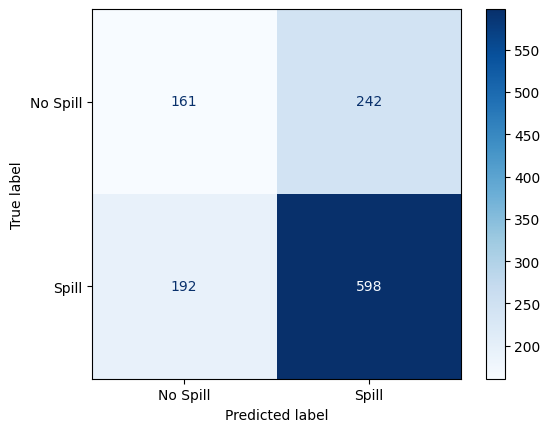

In [8]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Results from your models
results = {
    "Isolation Forest": {"accuracy": 0.33, "precision_0": 0.33, "recall_0": 0.90, "f1_0": 0.48, "precision_1": 0.33, "recall_1": 0.03, "f1_1": 0.05},
    "One-Class SVM": {"accuracy": 0.34, "precision_0": 0.34, "recall_0": 0.94, "f1_0": 0.50, "precision_1": 0.48, "recall_1": 0.03, "f1_1": 0.05},
    "K-Means Clustering": {"accuracy": 0.54, "precision_0": 0.33, "recall_0": 0.31, "f1_0": 0.32, "precision_1": 0.65, "recall_1": 0.66, "f1_1": 0.66},
    "DBSCAN": {"accuracy": 0.35, "precision_0": 0.35, "recall_0": 1.00, "f1_0": 0.51, "precision_1": 0.83, "recall_1": 0.01, "f1_1": 0.02},
    "Autoencoder": {"accuracy": 0.35, "precision_0": 0.34, "recall_0": 0.93, "f1_0": 0.50, "precision_1": 0.54, "recall_1": 0.04, "f1_1": 0.08},
    "LSTM": {"accuracy": 0.78, "precision_0": 0.89, "recall_0": 0.40, "f1_0": 0.55, "precision_1": 0.76, "recall_1": 0.97, "f1_1": 0.86},
}

# Determine the best model (based on accuracy, or recall for class 1, or a combination)
best_model = max(results, key=lambda model: results[model]["accuracy"])

# Print the best model's details
print(f"Best model: {best_model}")
print(f"Accuracy: {results[best_model]['accuracy']}")
print(f"Precision (class 0): {results[best_model]['precision_0']}, Recall (class 0): {results[best_model]['recall_0']}, F1-score (class 0): {results[best_model]['f1_0']}")
print(f"Precision (class 1): {results[best_model]['precision_1']}, Recall (class 1): {results[best_model]['recall_1']}, F1-score (class 1): {results[best_model]['f1_1']}")

# Let's assume the true and predicted values (y_true and y_pred) are known for the best model
# Here, I'm using a hypothetical example for LSTM (you can replace this with your actual predictions)

y_true = [0]*403 + [1]*790  # True labels (0 and 1)
y_pred = [0]*161 + [1]*242 + [0]*192 + [1]*598  # Predicted labels (Example for LSTM)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Spill", "Spill"])
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()



Random Forest Classifier Accuracy: 0.8365650969529086


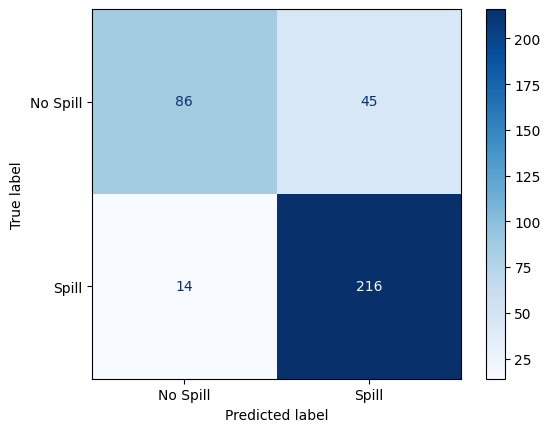

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('vessel_speeds_with_oil_spill_and_heading_all_entries.xlsx')

# Define features and target
X = data[['Speed (km/h)', 'Heading']]  # Add more relevant features if needed
y = data['After oil spill']  # Target variable

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict using the trained model
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf}")

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["No Spill", "Spill"])
disp_rf.plot(cmap=plt.cm.Blues)
plt.show()



Random Forest Classifier Accuracy: 0.8365650969529086


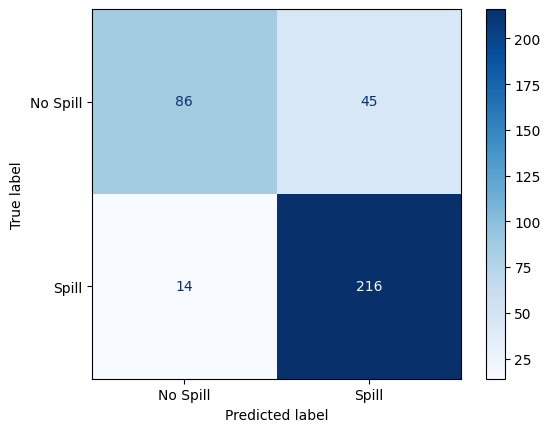

Model saved to 'random_forest_model.pkl'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('vessel_speeds_with_oil_spill_and_heading_all_entries.xlsx')

# Define features and target
X = data[['Speed (km/h)', 'Heading']]  # Add more relevant features if needed
y = data['After oil spill']  # Target variable

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict using the trained model
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf}")

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["No Spill", "Spill"])
disp_rf.plot(cmap=plt.cm.Blues)
plt.show()

# Save the model to a pickle file
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)
    print("Model saved to 'random_forest_model.pkl'")
    from google.colab import files

# Download the pickle file
files.download('random_forest_model.pkl')

